In [1]:
import os
import datetime

# 打印时间
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"==========" * 8 + "%s" % nowtime)

# mac系统上pytorch和matplotlib在jupyter中同时跑需要更改环境变量
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchkeras import Model, summary
%matplotlib inline

## 线性回归模型

### 准备数据

In [3]:
# 生成数据集
n = 400
X = 10 * torch.rand((n, 2)) - 5.0 # (n, 2)
w0 = torch.tensor([[2.0], [-3.0]]) # (2, 1)
b0 = torch.tensor([[10.0]]) # (1, 1)
Y = X @ w0 + b0 + torch.normal(0.0, 2.0, size=(n, 1))

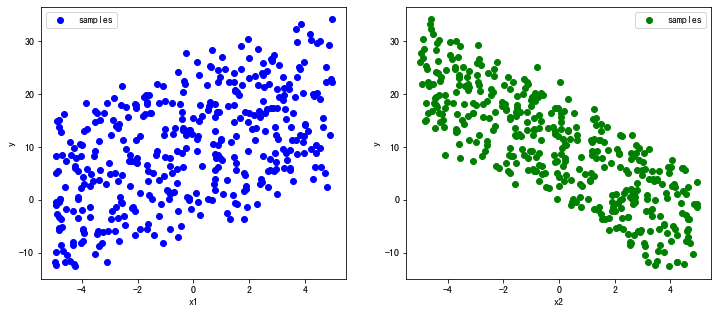

In [4]:
# 可视化
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c='b', label='samples')
ax1.legend()
plt.xlabel('x1')
plt.ylabel('y')

ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0], c='g', label='samples')
ax2.legend()
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

In [5]:
# 构建输入数据管道
ds = TensorDataset(X, Y)
ds_train,ds_valid = torch.utils.data.random_split(ds, [int(400 * 0.7), 400 - int(400 * 0.7)])
dl_train = DataLoader(ds_train, batch_size=10, shuffle=True, num_workers=2)
dl_valid = DataLoader(ds_valid, batch_size=10, num_workers=2)

### 定义模型

In [6]:
class LinearRegression(Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(2, 1)
        
    def forward(self, x):
        return self.fc(x)

In [7]:
model = LinearRegression()

In [8]:
model.summary(input_shape=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000008
Forward/backward pass size (MB): 0.000008
Params size (MB): 0.000011
Estimated Total Size (MB): 0.000027
----------------------------------------------------------------


### 训练模型

In [9]:
def mean_absolute_error(y_pred, y_true):
    return torch.mean(torch.abs(y_pred - y_true))

def mean_absolute_precent_error(y_pred, y_true):
    absolute_precent_error = (torch.abs(y_pred - y_true) + 1e-7) / (torch.abs(y_true) + 1e-7)
    return torch.mean(absolute_precent_error)

model.compile(
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(model.parameters(), lr=0.01),
    metrics_dict={'mae': mean_absolute_error, 'mape': mean_absolute_precent_error}
)

dfhistory = model.fit(
    epochs=52, # 从epochs=200来看, 52个epochs效果较好
    dl_train=dl_train,
    dl_val=dl_valid,
    log_step_freq=20
)

Start Training ...

================================================================================2021-06-21 20:18:46
{'step': 20, 'loss': 184.633, 'mae': 11.2, 'mape': 1.36}

 +-------+---------+-------+-------+----------+---------+----------+
| epoch |   loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+---------+-------+-------+----------+---------+----------+
|   1   | 187.097 | 11.27 | 1.334 | 152.182  |  10.546 |  8.681   |
+-------+---------+-------+-------+----------+---------+----------+

================================================================================2021-06-21 20:18:47
{'step': 20, 'loss': 163.426, 'mae': 10.503, 'mape': 1.131}

 +-------+---------+--------+-------+----------+---------+----------+
| epoch |   loss  |  mae   |  mape | val_loss | val_mae | val_mape |
+-------+---------+--------+-------+----------+---------+----------+
|   2   | 164.469 | 10.588 | 1.162 | 134.629  |  9.956  |  9.765   |
+-------+---------+--------+-------+------

{'step': 20, 'loss': 35.176, 'mae': 5.599, 'mape': 1.803}

 +-------+--------+-------+------+----------+---------+----------+
| epoch |  loss  |  mae  | mape | val_loss | val_mae | val_mape |
+-------+--------+-------+------+----------+---------+----------+
|   18  | 35.388 | 5.576 | 1.75 |  33.673  |  5.364  |  12.991  |
+-------+--------+-------+------+----------+---------+----------+

================================================================================2021-06-21 20:19:10
{'step': 20, 'loss': 32.813, 'mae': 5.383, 'mape': 1.923}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   19  | 32.961 | 5.366 | 1.715 |  31.448  |  5.171  |  12.716  |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-06-21 20:19:11
{'step': 20, 

{'step': 20, 'loss': 11.029, 'mae': 2.82, 'mape': 0.71}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   35  | 10.989 | 2.846 | 0.997 |  10.739  |  2.695  |   5.16   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-06-21 20:19:33
{'step': 20, 'loss': 9.794, 'mae': 2.659, 'mape': 0.75}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   36  | 10.298 | 2.745 | 0.964 |  10.105  |  2.599  |  4.756   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-06-21 20:19:34
{'step': 20,

{'step': 20, 'loss': 4.747, 'mae': 1.753, 'mape': 0.639}

 +-------+------+------+------+----------+---------+----------+
| epoch | loss | mae  | mape | val_loss | val_mae | val_mape |
+-------+------+------+------+----------+---------+----------+
|   52  | 4.77 | 1.78 | 0.58 |  4.957   |  1.727  |   1.03   |
+-------+------+------+------+----------+---------+----------+

================================================================================2021-06-21 20:19:56
Finished Training...


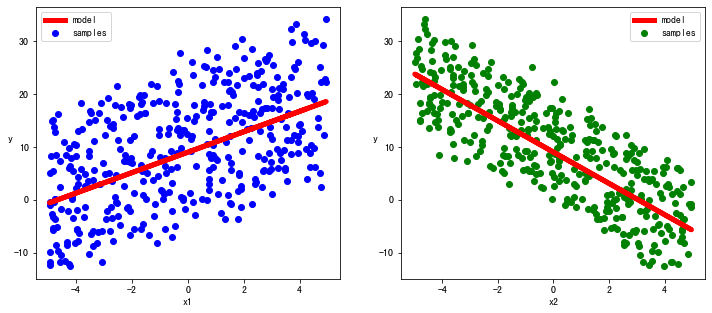

In [10]:
# 结果可视化
w, b = model.state_dict()["fc.weight"], model.state_dict()["fc.bias"]

plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c="b", label="samples")
ax1.plot(X[:, 0], w[0, 0] * X[:, 0] + b[0], "-r", linewidth=5.0, label="model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y", rotation=0)


ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0], c="g", label="samples")
ax2.plot(X[:, 1], w[0, 1] * X[:, 1] + b[0], "-r", linewidth=5.0, label="model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation=0)

plt.show()

### 评估模型

In [11]:
dfhistory.tail()

,loss,mae,mape,val_loss,val_mae,val_mape
47,5.450140,1.921486,0.637407,5.585744,1.838124,1.038303
48,5.249652,1.880301,0.621365,5.397060,1.803585,0.806229
49,5.076297,1.842657,0.609907,5.226617,1.772444,0.648026
50,4.914854,1.812076,0.588468,5.105095,1.751646,0.903260
51,4.770063,1.780193,0.580397,4.957341,1.727311,1.030419


In [12]:
def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, 'val_' + metric])
    plt.show()

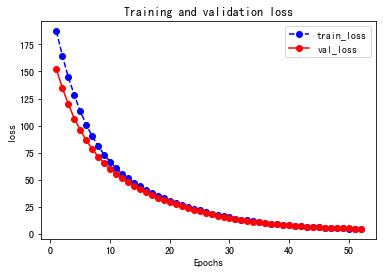

In [13]:
plot_metric(dfhistory, "loss")

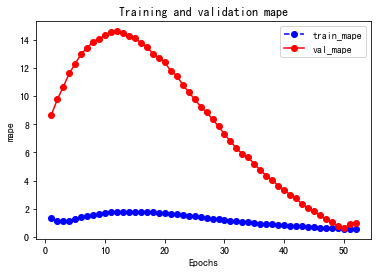

In [14]:
plot_metric(dfhistory,"mape")

In [15]:
# 评估
model.evaluate(dl_valid)

{'val_loss': 4.9573408762613935,
 'val_mae': 1.7273114323616028,
 'val_mape': 1.0304188889761765}

In [16]:
dl = DataLoader(TensorDataset(X))
model.predict(dl)[0: 10]

tensor([[27.1876],
        [27.3101],
        [ 8.4145],
        [15.0804],
        [ 9.5332],
        [ 9.4447],
        [ 5.8205],
        [ 8.3597],
        [ 3.4913],
        [12.9724]])

In [17]:
model.predict(dl_valid)[0: 10]

tensor([[ 11.7299],
        [  2.2172],
        [  2.4871],
        [ 16.2931],
        [ 11.2390],
        [ 23.3657],
        [ -1.6006],
        [  9.3163],
        [-10.9254],
        [  4.2974]])

## DNN二分类模型

In [ ]:
# 正负样本数
n_positive, n_negative = 2000, 2000

# 生成正样本, 小圆环分布
r_p = 5.0 + torch.normal(0.0, 1.0, size=(n_positive, 1))
theta_p = 2 * np.pi * torch.rand((n_positive, 1))
# torch.cat() axis=1 沿着列方向拼接
Xp = torch.cat([r_p * torch.cos(theta_p), r_p * torch.sin(theta_p)], axis=1)
Yp = torch.ones_like(r_p)

# 生成负样本, 大圆环分布
r_n = 8.0 + torch.normal(0.0, 1.0, size=(n_negative, 1))
theta_n = 2 * np.pi * torch.rand((n_negative, 1))
Xn = torch.cat([r_n * torch.cos(theta_n), r_n * torch.sin(theta_n)], axis=1)
Yn = torch.zeros_like(r_n)

# 汇总样本
X = torch.cat([Xp, Xn], axis=0) # 沿着行方向拼接
Y = torch.cat([Yp, Yn], axis=0)

In [ ]:
# 可视化
plt.figure(figsize=(6, 6))
plt.scatter(Xp[:, 0], Xp[:, 1], c='r')
plt.scatter(Xn[:, 0], Xn[:, 1], c='g')
plt.legend(['Positive', 'Negative'])
plt.show()

In [ ]:
ds = TensorDataset(X, Y)

ds_train, ds_valid = torch.utils.data.random_split(ds, [int(len(ds) * 0.7), len(ds) - int(len(ds) * 0.7)])
dl_train = DataLoader(ds_train, batch_size=100, shuffle=True, num_workers=2)
dl_valid = DataLoader(ds_valid, batch_size=100, num_workers=2)